In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_DataScience/IBM_EduNet/Restaurant_Reviews.tsv', delimiter='\t',quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.shape

(1000, 2)

In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [6]:
df['Liked'].isnull().sum()

0

In [7]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
def clean_data(text):
  words=text.lower()
  words = re.sub(r'[^a-zA-Z\s]', '', words)
  words=words.split(' ')
  words=[word for word in words if not word in set(stopwords.words('english'))]
  stemmer=PorterStemmer()
  words = [stemmer.stem(word) for word in words]
  words=' '.join(words)
  return words

In [11]:
df['Review_Cleaned']=df['Review'].apply(lambda x: clean_data(x))
df

,Review,Liked,Review_Cleaned
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack
996,Appetite instantly gone.,0,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,overal impress would go back
998,"The whole experience was underwhelming, and I ...",0,whole experi underwhelm think well go ninja su...


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(df['Review_Cleaned']).toarray()
y=df.iloc[:,1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [15]:
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear')
}

# Loop through each classifier
for classifier_name, classifier in classifiers.items():
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Make predictions using the classifier
    y_pred = classifier.predict(X_test)

    # Calculate and print scores for the classifier
    accu_score = accuracy_score(y_test, y_pred)
    pre_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)
    cm=confusion_matrix(y_test, y_pred)

    print(f"----------------------{classifier_name}----------------------")
    print(f"Accuracy Score: {round(accu_score * 100, 2)}%")
    print(f"Precision Score: {round(pre_score * 100, 2)}%")
    print(f"Recall Score: {round(rec_score * 100, 2)}%")
    print(f"Confusin Matrix")
    print(cm)
    print()

----------------------Multinomial Naive Bayes----------------------
Accuracy Score: 78.5%
Precision Score: 78.85%
Recall Score: 79.61%
Confusin Matrix
[[75 22]
 [21 82]]

----------------------K-Nearest Neighbors----------------------
Accuracy Score: 67.5%
Precision Score: 73.17%
Recall Score: 58.25%
Confusin Matrix
[[75 22]
 [43 60]]

----------------------Support Vector Machine----------------------
Accuracy Score: 73.5%
Precision Score: 77.17%
Recall Score: 68.93%
Confusin Matrix
[[76 21]
 [32 71]]



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual values')

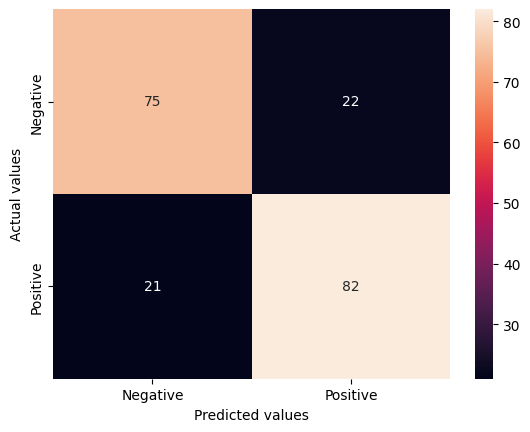

In [17]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

best_acc=0.0
alpha_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
for i in alpha_values:
  mnb_new = MultinomialNB(alpha=i)
  mnb_new.fit(X_train, y_train)
  y_pred_temp = mnb_new.predict(X_test)
  accur_score = accuracy_score(y_test, y_pred_temp)
  if accur_score>best_acc:
    best_acc=accur_score
  print(best_acc)


0.77
0.785
0.785
0.785
0.785
0.785


In [19]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

def predict_sentiment(review):
    cleaned_review = clean_data(review)
    transformed_cv = cv.transform([cleaned_review])
    sentiment = clf.predict(transformed_cv)
    return sentiment


In [20]:
# feedback="The food is really bad"
# feedback="The food is pretty bad and serive was very bad"
feedback = "The food is really bad."
predicted_sentiment = predict_sentiment(feedback)

if predicted_sentiment[0] == 1:
    print("Positive review")
else:
    print("Negative review")

Negative review


# **Using TF-IDF**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(max_features=1500)
X_tfidf = tfidf_vectorizer.fit_transform(df['Review_Cleaned']).toarray()
y = df.iloc[:, 1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),  # Adjust hyperparameters as needed
    'XGBoost': XGBClassifier(random_state=42)  # Adjust hyperparameters as needed
}

# Loop through each classifier
for classifier_name, classifier in classifiers.items():
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Make predictions using the classifier
    y_pred = classifier.predict(X_test)

    # Calculate and print scores for the classifier
    accu_score = accuracy_score(y_test, y_pred)
    pre_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"----------------------{classifier_name}----------------------")
    print(f"Accuracy Score: {round(accu_score * 100, 2)}%")
    print(f"Precision Score: {round(pre_score * 100, 2)}%")
    print(f"Recall Score: {round(rec_score * 100, 2)}%")
    print(f"Confusion Matrix")
    print(cm)
    print()


----------------------Multinomial Naive Bayes----------------------
Accuracy Score: 78.5%
Precision Score: 78.85%
Recall Score: 79.61%
Confusion Matrix
[[75 22]
 [21 82]]

----------------------K-Nearest Neighbors----------------------
Accuracy Score: 67.5%
Precision Score: 73.17%
Recall Score: 58.25%
Confusion Matrix
[[75 22]
 [43 60]]

----------------------Support Vector Machine----------------------
Accuracy Score: 73.5%
Precision Score: 77.17%
Recall Score: 68.93%
Confusion Matrix
[[76 21]
 [32 71]]

----------------------Random Forest----------------------
Accuracy Score: 74.5%
Precision Score: 85.14%
Recall Score: 61.17%
Confusion Matrix
[[86 11]
 [40 63]]

----------------------XGBoost----------------------
Accuracy Score: 70.5%
Precision Score: 77.5%
Recall Score: 60.19%
Confusion Matrix
[[79 18]
 [41 62]]



Text(50.722222222222214, 0.5, 'Actual values')

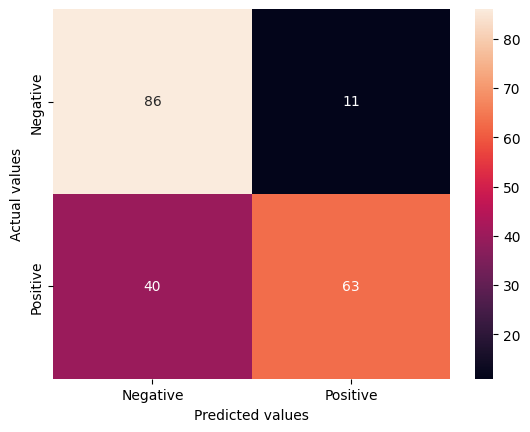

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [26]:
rf.fit(X_train, y_train)

def predict_sentiment(review):
    cleaned_review = clean_data(review)
    transformed_tfidf = tfidf_vectorizer.transform([cleaned_review])
    sentiment = rf.predict(transformed_tfidf)
    return sentiment


In [28]:
# feedback="The food is pretty awesome, it was very pleaseant the serive was good"
feedback="The food is pretty bad and serive was very bad"
#feedback = "The food is really bad."
predicted_sentiment = predict_sentiment(feedback)

if predicted_sentiment[0] == 1:
    print("Positive review")
else:
    print("Negative review")

Negative review
